ResNet model for cifar10

In [ ]:
import keras
import numpy as np
from matplotlib import pyplot
import tensorflow_datasets as tfds

In [2]:
#load cifar10 dataset
train_X, train_y = tfds.as_numpy(tfds.load('cifar10', split='train', batch_size=-1, shuffle_files=True, as_supervised = True))
test_X, test_y = tfds.as_numpy(tfds.load('cifar10', split='test', batch_size=-1, shuffle_files=True, as_supervised = True))

In [3]:
print("The shape of the training examples is " + str(train_X.shape))
print("The shape of the training labels is " + str(train_y.shape))
print("The shape of the test examples is " + str(test_X.shape))
print("The shape of the test labels is " + str(test_y.shape))

The shape of the training examples is (50000, 32, 32, 3)
The shape of the training labels is (50000,)
The shape of the test examples is (10000, 32, 32, 3)
The shape of the test labels is (10000,)


In [4]:
#one hot encoding
train_y = keras.utils.to_categorical(train_y, num_classes=10)
test_y = keras.utils.to_categorical(test_y, num_classes=10)

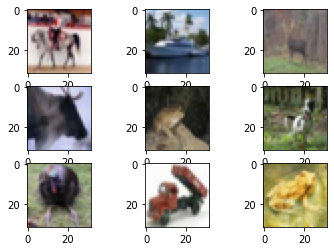

In [5]:
#displaying training images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i])
pyplot.show()

In [6]:
#preprocess training and test sets
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0

In [50]:
#defining resnet_block which will be used in the model
def resnet_block(X, filters):
    F1, F2, F3 = filters
    X_input = X
    X = keras.layers.Conv2D(F1, (1,1))(X_input)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.Conv2D(F2, (3,3), padding='same')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.Conv2D(F3, (1,1))(X)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.Add()([X, X_input])
    X = keras.layers.Activation('relu')(X)
    return X

In [55]:
#creating the model
def model(input_shape):
    X_input = keras.Input(input_shape)
    X = keras.layers.Conv2D(256, (3,3), padding='same')(X_input)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.Activation('relu')(X)
    X = resnet_block(X, [64,64,256])
    X = resnet_block(X, [64,64,256])
    X = resnet_block(X, [128, 128, 256])
    X = resnet_block(X, [128, 128, 256])
    X = resnet_block(X, [256, 256, 256])
    X = resnet_block(X, [256, 256, 256])
    X = keras.layers.AveragePooling2D((2,2))(X)
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(10, activation='softmax')(X)
    model = keras.models.Model(inputs=X_input, outputs=X)
    return model

In [56]:
resnet = model(train_X.shape[1:])

In [57]:
resnet.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 32, 32, 256)  7168        input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_110 (BatchN (None, 32, 32, 256)  1024        conv2d_110[0][0]                 
__________________________________________________________________________________________________
activation_100 (Activation)     (None, 32, 32, 256)  0           batch_normalization_110[0][0]    
____________________________________________________________________________________________

In [1]:
keras.utils.plot_model(resnet, to_file='models/resnet_cifar10.png')

NameError: name 'keras' is not defined

In [42]:
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
resnet.fit(train_X, train_y, epochs=4)

Epoch 1/3
50000/50000 [==============================] - 1300s 26ms/step - loss: 1.5046 - accuracy: 0.4728
Epoch 2/3
49184/50000 [============================>.] - ETA: 19s - loss: 1.0722 - accuracy: 0.6267

KeyboardInterrupt: 

In [ ]:
resnet.evaluate(test_X, test_y)

In [ ]:
keras.backend.clear_session()